# Importing Libraries

In [83]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import mean_squared_error 
from math import sqrt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


# Data Reading and Analysing

In [84]:
df=pd.read_csv("teleCust1000t.csv")

In [85]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [86]:
df.custcat.nunique()

4

In [87]:
df["custcat"].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [88]:
df["region"].value_counts()

3    344
2    334
1    322
Name: region, dtype: int64

In [89]:
df["reside"].value_counts()

1    375
2    272
3    138
4    120
5     60
6     29
7      4
8      2
Name: reside, dtype: int64

In [90]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [91]:
df.dtypes


region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

#   Crating axis

In [92]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
y = df['custcat']

# Standardizing data

In [93]:
global X
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# Creating Train and Test

In [94]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

# KNN Algorithm with k range(1-50)

In [95]:
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error,"||",end=" ")
    print('Accuracy value for k= ' , K , 'is:',accuracy_score(y_test, pred))

RMSE value for k=  1 is: 1.5427248620541512 || Accuracy value for k=  1 is: 0.3
RMSE value for k=  2 is: 1.5905973720586866 || Accuracy value for k=  2 is: 0.29
RMSE value for k=  3 is: 1.6217274740226855 || Accuracy value for k=  3 is: 0.315
RMSE value for k=  4 is: 1.6 || Accuracy value for k=  4 is: 0.32
RMSE value for k=  5 is: 1.54434452114805 || Accuracy value for k=  5 is: 0.315
RMSE value for k=  6 is: 1.6093476939431082 || Accuracy value for k=  6 is: 0.31
RMSE value for k=  7 is: 1.606237840420901 || Accuracy value for k=  7 is: 0.335
RMSE value for k=  8 is: 1.61245154965971 || Accuracy value for k=  8 is: 0.325
RMSE value for k=  9 is: 1.5652475842498528 || Accuracy value for k=  9 is: 0.34
RMSE value for k=  10 is: 1.5508062419270823 || Accuracy value for k=  10 is: 0.33
RMSE value for k=  11 is: 1.5716233645501712 || Accuracy value for k=  11 is: 0.315
RMSE value for k=  12 is: 1.5763882770434445 || Accuracy value for k=  12 is: 0.34
RMSE value for k=  13 is: 1.5732132722

# RMSE plot

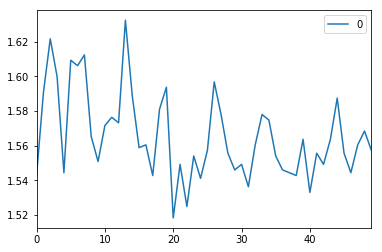

In [96]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# KNN Algorithm with k range(1-100)

In [97]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 , 0.36 , 0.355, 0.35 ,
       0.345, 0.335, 0.35 , 0.36 , 0.37 , 0.365, 0.365, 0.365, 0.35 ,
       0.36 , 0.38 , 0.385, 0.395, 0.395, 0.38 , 0.37 , 0.365, 0.385,
       0.395, 0.41 , 0.395, 0.395, 0.395, 0.38 , 0.39 , 0.375, 0.365,
       0.38 , 0.375, 0.375, 0.365, 0.36 , 0.36 , 0.365, 0.37 , 0.38 ,
       0.37 , 0.37 , 0.37 , 0.36 , 0.35 , 0.36 , 0.355, 0.36 , 0.36 ,
       0.36 , 0.34 , 0.34 , 0.345, 0.35 , 0.35 , 0.355, 0.365, 0.355,
       0.355, 0.365, 0.37 , 0.37 , 0.37 , 0.35 , 0.35 , 0.35 , 0.35 ,
       0.36 , 0.355, 0.33 , 0.32 , 0.345, 0.345, 0.345, 0.335, 0.345,
       0.355, 0.345, 0.345, 0.34 , 0.34 , 0.335, 0.345, 0.325, 0.315])

# Accuracy Plot

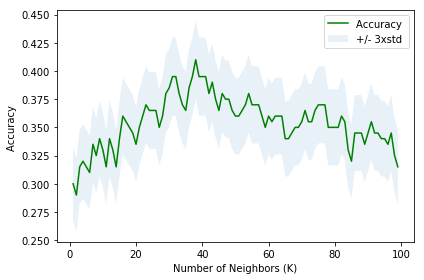

In [98]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Predictions

In [99]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.41 with k= 38


# Creators
<h1><b><i>Shashwat Shah and Rishabh Gaur</i></b></h1>